### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

### Loading dataset

In [2]:
dataset = pd.read_csv("weight_height.csv")
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### Plotting histogram

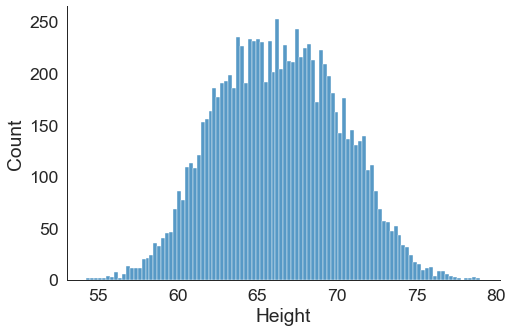

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

sns.displot(data=dataset, x="Height", kind="hist", bins = 100, aspect = 1.5)

### Data Preparation

In [5]:
height = dataset["Height"].values

### Fitting distribution

,sumsquare_error,aic,bic,kl_div
beta,0.003108,848.384435,-149805.599729,inf
lognorm,0.005284,803.863780,-144506.315623,inf
gamma,0.005299,803.914125,-144478.523444,inf
norm,0.005383,802.162043,-144330.934485,inf
burr,0.014954,873.340116,-134094.334300,inf


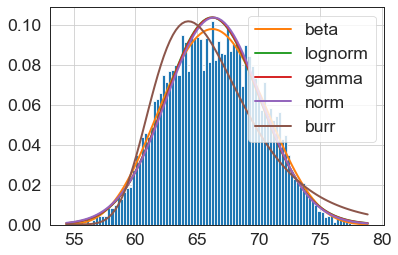

In [6]:
f = Fitter(height,
           distributions=['gamma',
                          'lognorm', 
                          "beta", 
                          "burr", 
                          "norm"])
f.fit()

f.summary()

### Best distribution

In [9]:
f.get_best(method = 'sumsquare_error')

{'beta': (5.958303879012979,
  6.498121982766356,
  52.87268601986762,
  28.21351507429388)}

### Identifying the parameters

In [14]:
f.fitted_param["beta"]

(5.958303879012979, 6.498121982766356, 52.87268601986762, 28.21351507429388)

```
shape parameters ([a, b]) = [5.958, 6.498]
scale parameter (scale) = 52.872
location parameter (loc) = 28.213
```

## Fitting distribution on simulated data

### Common distributions

In [16]:
from fitter import get_common_distributions
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

### Generating data from normal distribution

In [17]:
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 10000)

In [20]:
data

array([ 0.05058757,  0.09303424, -0.14789721, ..., -0.10781146,
       -0.08059185,  0.09608844])

,sumsquare_error,aic,bic,kl_div
norm,1.415710,244.926187,-88608.669437,inf
gamma,1.429672,247.151885,-88501.321952,inf
lognorm,1.464633,247.696547,-88259.724621,inf
chi2,3.405414,270.887624,-79822.108084,inf
exponpow,19.527804,431.648514,-62357.379806,inf


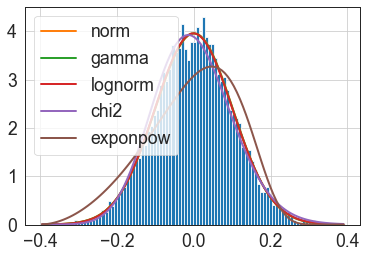

In [18]:
f = Fitter(data,
           distributions= get_common_distributions())
f.fit()
f.summary()

### Get best fitted distribution

In [19]:
f.get_best(method = 'sumsquare_error')

{'norm': (0.0005453480539770774, 0.10081629489894989)}

### Get all supported distribution

In [17]:
from fitter import get_distributions
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 

In [ ]:
['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime',
 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine',
 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon',
 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife',
  'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r',
  'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma',
  'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm',
  'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r',
  'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
  'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb',
  'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign',
  'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma',
  'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax',
  'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
  'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw',
  'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss',
  'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular',
  'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm',
  'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald',
  'weibull_max', 'weibull_min', 'wrapcauchy']